## Project Final for ECE 556: AI for Radar and Remote Sensing
Paul Delgado

In [ ]:
pip install 

In [1]:
# Python packages
import csv
import os
import pathlib
import requests
import sys
import zipfile

In [2]:
# Third-party packages
import mne_bids
import openneuro
import tensorflow as tf

### 1) Prepare Dataset

In [24]:
dataset = 'ds004040'

subject = '001'
session = '01'
run = 1
task = 'trance'
suffix = 'eeg'
datatype = 'eeg'

In [17]:
bids_root = os.path.join(os.getcwd(), dataset)
print(bids_root)

C:\Users\PaulDRP\source\repos\eeg1\ds004040


In [18]:
if not os.path.isdir(bids_root):
    os.makedirs(bids_root)

#### 1.1) Download Data (BIDS-standard repo)

In [19]:
#openneuro.download(dataset=dataset, target_dir=bids_root)
openneuro.download(dataset=dataset, target_dir=bids_root, include=[f'sub-{subject}'])


👋 Hello! This is openneuro-py 2022.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004040 …
👉 Retrieving up to 16 files (5 concurrent downloads).
✅ Finished downloading ds004040.

🧠 Please enjoy your brains.



#### 1.2) Load Data

In [36]:
#bids_path = mne_bids.BIDSPath(root=bids_root, datatype=datatype)
#bids_path = mne_bids.BIDSPath(root=bids_root, session=session, datatype=datatype)
#bids_path = mne_bids.BIDSPath(root=bids_root, subject=subject, datatype=datatype, task=task)
#bids_path = mne_bids.BIDSPath(root=bids_root, subject=subject, datatype=datatype, task=task, run=run )
#bids_path = mne_bids.BIDSPath(root=bids_root, subject=subject, session=session, datatype=datatype, task=task )
bids_path = mne_bids.BIDSPath(root=bids_root, 
                              subject=subject, 
                              session=session, 
                              datatype=datatype, 
                              task=task, 
                              suffix = suffix,
                              extension='.set'
                             )
#bids_path = mne_bids.BIDSPath(subject=subject, session=session, task=task, suffix=suffix, datatype=datatype, root=bids_root)
print(bids_path)

C:/Users/PaulDRP/source/repos/eeg1/ds004040/sub-001/ses-01/eeg/sub-001_ses-01_task-trance_eeg.set


In [38]:
#raw = mne_bids.read_raw_bids(bids_path=bids_path, verbose=False)
raw = mne_bids.read_raw_bids(bids_path=bids_path)

C:\Users\PaulDRP\AppData\Local\Temp\ipykernel_21204\1900270220.py:2: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne_bids.read_raw_bids(bids_path=bids_path)


Reading events from C:\Users\PaulDRP\source\repos\eeg1\ds004040\sub-001\ses-01\eeg\sub-001_ses-01_task-trance_events.tsv.
The event "STATUS" refers to multiple event values. Creating hierarchical event names.
    Renaming event: STATUS -> STATUS/rest1_start
    Renaming event: STATUS -> STATUS/rest1_end
    Renaming event: STATUS -> STATUS/trance1_start
    Renaming event: STATUS -> STATUS/trance1_end
    Renaming event: STATUS -> STATUS/trance2_start
    Renaming event: STATUS -> STATUS/trance2_end
    Renaming event: STATUS -> STATUS/rest2_start
    Renaming event: STATUS -> STATUS/rest2_end
    Renaming event: STATUS -> STATUS/rest3_start
    Renaming event: STATUS -> STATUS/rest3_end
    Renaming event: STATUS -> STATUS/trance3_start
    Renaming event: STATUS -> STATUS/trance3_end
Reading channel info from C:\Users\PaulDRP\source\repos\eeg1\ds004040\sub-001\ses-01\eeg\sub-001_ses-01_task-trance_channels.tsv.


In [39]:
print(raw.info['subject_info'])

{'his_id': 'sub-001'}


In [40]:
print(raw.info['sfreq'])

512.0


In [42]:
print(raw.annotations)

<Annotations | 12 segments: STATUS/rest1_end (1), STATUS/rest1_start (1), ...>


In [46]:
print(raw.annotations[0])

OrderedDict([('onset', 173.78125), ('duration', 0.0), ('description', 'STATUS/rest1_start'), ('orig_time', None)])


In [47]:
print(raw.annotations[1])

OrderedDict([('onset', 786.71875), ('duration', 0.0), ('description', 'STATUS/rest1_end'), ('orig_time', None)])


In [48]:
print(raw.annotations[2])

OrderedDict([('onset', 899.75), ('duration', 0.0), ('description', 'STATUS/trance1_start'), ('orig_time', None)])


Using matplotlib as 2D backend.
Opening raw-browser...


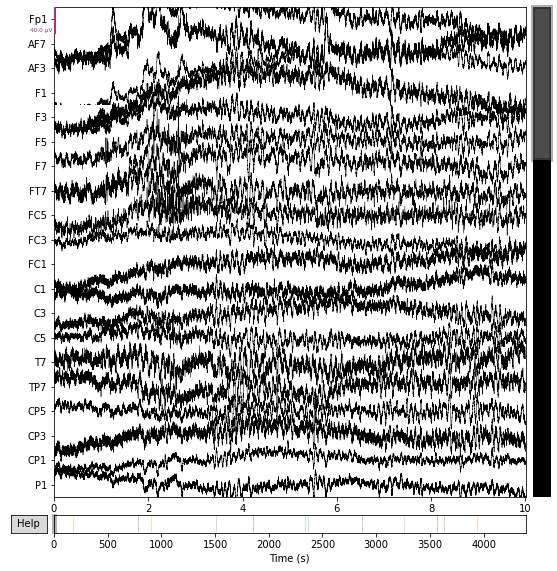

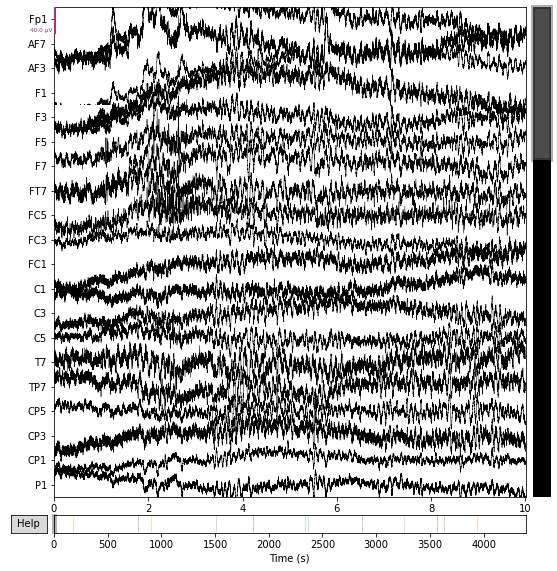

In [41]:
raw.plot()

Finding segments below or above PTP threshold.


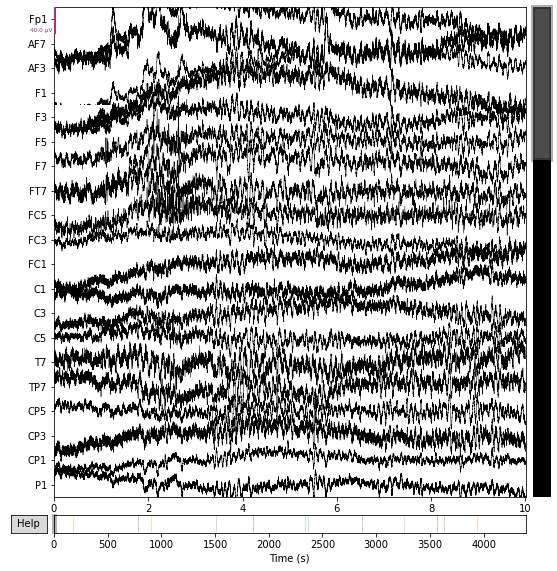

In [51]:
mne_bids.inspect_dataset(bids_path)

#### 1.3) Format BIDS into Tensorflow Dataset

In [50]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])

### Build model

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.Input(shape=8, name="inputLayer"))
model.add(tf.keras.layers.Dense(512*4))
#model.add(tf.keras.layers.Conv1D(40, 10, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation = tf.nn.softmax))

In [ ]:
model.compile(loss=tf.keras.losses.MeanAbsoluteError(), 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=tf.keras.metrics.Accuracy())

In [ ]:
model.summary()

#### Train

In [ ]:
#model.fit(, epochs=10)

#### Evaluate

In [ ]:
#loss, accuracy = model.evaluate(, verbose=2)